In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import sklearn.linear_model

In [3]:
linear = sklearn.linear_model.LinearRegression()
linear2 = sklearn.linear_model.LinearRegression()
linear3 = sklearn.linear_model.LinearRegression()
data = pd.read_csv('Cars93.csv')

In [4]:
X1 = data['Horsepower'].values.reshape(-1,1)
X2 = data['MPG.highway'].values.reshape(-1,1)
X3 = data['Turn.circle'].values.reshape(-1,1)
Y = data['Price'].values.reshape(-1,1)

[49.05463153]
[[-1.01577846]]
0.314362468002246


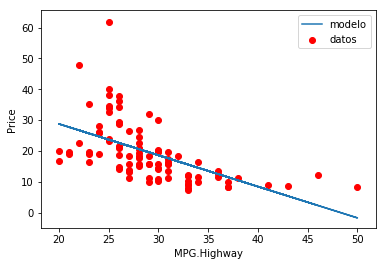

In [5]:
linear.fit(X2,Y)
print(linear.intercept_)
print(linear.coef_)
print(linear.score(X2, Y))
Y2_predict = linear.predict(X2)
plt.plot(X2, Y2_predict, label='modelo')
plt.scatter(X2, Y, label='datos', color='red')
plt.legend()
plt.xlabel('MPG.Highway')
_ = plt.ylabel('Price')

[-26.32351055]
[[1.17650745]]
0.15412685056314568


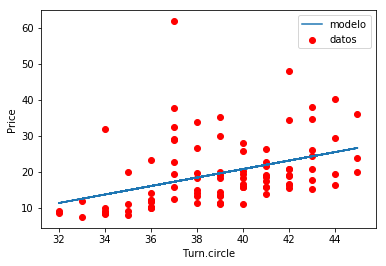

In [6]:
linear.fit(X3,Y)
print(linear.intercept_)
print(linear.coef_)
print(linear.score(X3, Y))
Y3_predict = linear.predict(X3)
plt.plot(X3, Y3_predict, label='modelo')
plt.scatter(X3, Y, label='datos', color='red')
plt.legend()
plt.xlabel('Turn.circle')
_ = plt.ylabel('Price')

Según $R^2$ la mejor regresion lineal, Horsepower se adapta mejor al modelo. 

(93, 2)
[6.75225042]
[[ 0.13190677 -0.21365778]]
0.629865302134315


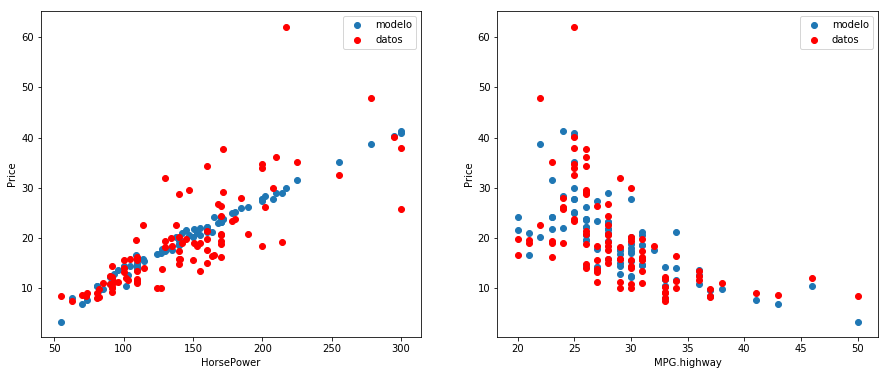

In [7]:
X_1 = data[['Horsepower', 'MPG.highway']]
print(np.shape(X_1))
linear2.fit(X_1,Y)
print(linear2.intercept_)
print(linear2.coef_)
print(linear2.score(X_1, Y))
Y3_predict = linear2.predict(X_1)
fig = plt.figure(figsize=(15,6))
primero = fig.add_subplot(121)
plt.scatter(X_1['Horsepower'], Y3_predict, label='modelo')
plt.scatter(X_1['Horsepower'], Y, label='datos', color='red')
plt.legend()
plt.xlabel('HorsePower')
_ = plt.ylabel('Price')
segundo = fig.add_subplot(122)
plt.scatter(X_1['MPG.highway'], Y3_predict, label='modelo')
plt.scatter(X_1['MPG.highway'], Y, label='datos', color='red')
plt.legend()
plt.xlabel('MPG.highway')
_ = plt.ylabel('Price')

(93, 2)
[6.00160489]
[[ 0.15289122 -0.21772625]]
0.6249029173886569


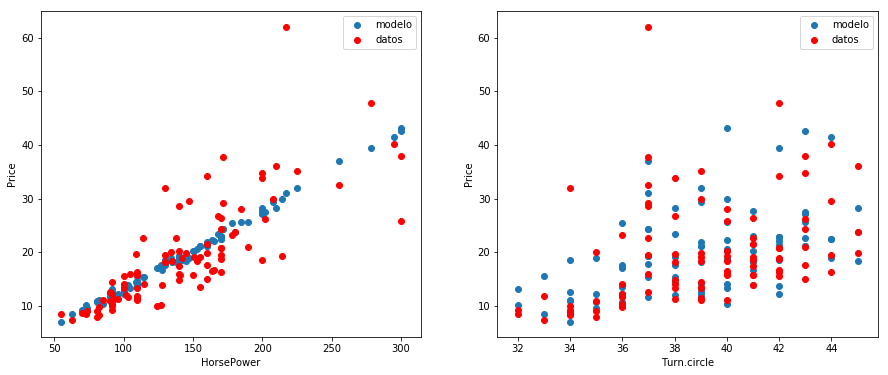

In [8]:
X_2 = data[['Horsepower', 'Turn.circle']]
print(np.shape(X_2))
linear2.fit(X_2,Y)
print(linear2.intercept_)
print(linear2.coef_)
print(linear2.score(X_2, Y))
Y3_predict = linear2.predict(X_2)
fig = plt.figure(figsize=(15,6))
primero = fig.add_subplot(121)
plt.scatter(X_2['Horsepower'], Y3_predict, label='modelo')
plt.scatter(X_2['Horsepower'], Y, label='datos', color='red')
plt.legend()
plt.xlabel('HorsePower')
_ = plt.ylabel('Price')
segundo = fig.add_subplot(122)
plt.scatter(X_2['Turn.circle'], Y3_predict, label='modelo')
plt.scatter(X_2['Turn.circle'], Y, label='datos', color='red')
plt.legend()
plt.xlabel('Turn.circle')
_ = plt.ylabel('Price')

(93, 2)
[35.4016788]
[[-0.91657745  0.27639688]]
0.3198708229328999


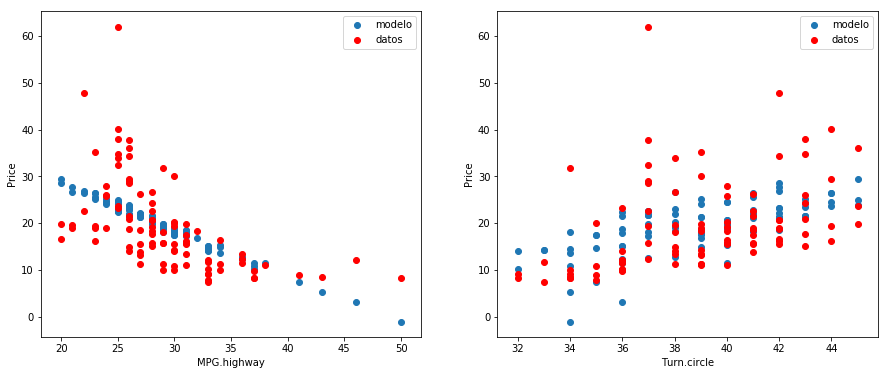

In [9]:
X_3 = data[['MPG.highway', 'Turn.circle']]
print(np.shape(X_3))
linear2.fit(X_3,Y)
print(linear2.intercept_)
print(linear2.coef_)
print(linear2.score(X_3, Y))
Y3_predict = linear2.predict(X_3)
fig = plt.figure(figsize=(15,6))
primero = fig.add_subplot(121)
plt.scatter(X_3['MPG.highway'], Y3_predict, label='modelo')
plt.scatter(X_3['MPG.highway'], Y, label='datos', color='red')
plt.legend()
plt.xlabel('MPG.highway')
_ = plt.ylabel('Price')
segundo = fig.add_subplot(122)
plt.scatter(X_3['Turn.circle'], Y3_predict, label='modelo')
plt.scatter(X_3['Turn.circle'], Y, label='datos', color='red')
plt.legend()
plt.xlabel('Turn.circle')
_ = plt.ylabel('Price')

Según $R^2$ la mejor regresion lineal con dos variables, Horsepower, MPG.Highway se adapta mejor al modelo. 

(93, 3)
[24.14202012]
[[ 0.1396872  -0.31082732 -0.40256029]]
0.6404523210544848


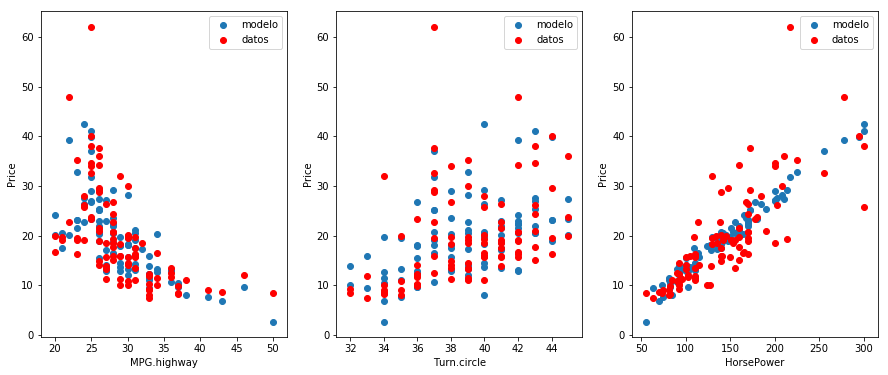

In [10]:
Super_X = data[['Horsepower','MPG.highway', 'Turn.circle']]
print(np.shape(Super_X))
linear3.fit(Super_X,Y)
print(linear3.intercept_)
print(linear3.coef_)
print(linear3.score(Super_X, Y))
Super_Y = linear3.predict(Super_X)
fig = plt.figure(figsize=(15,6))
primero = fig.add_subplot(131)
plt.scatter(Super_X['MPG.highway'], Super_Y, label='modelo')
plt.scatter(Super_X['MPG.highway'], Y, label='datos', color='red')
plt.legend()
plt.xlabel('MPG.highway')
_ = plt.ylabel('Price')
segundo = fig.add_subplot(132)
plt.scatter(Super_X['Turn.circle'], Super_Y, label='modelo')
plt.scatter(Super_X['Turn.circle'], Y, label='datos', color='red')
plt.legend()
plt.xlabel('Turn.circle')
_ = plt.ylabel('Price')
tercero = fig.add_subplot(133)
plt.scatter(Super_X['Horsepower'], Super_Y, label='modelo')
plt.scatter(Super_X['Horsepower'], Y, label='datos', color='red')
plt.legend()
plt.xlabel('HorsePower')
_ = plt.ylabel('Price')

Según $R^2$ la mejor regresion lineal con las tres variables es ligeramente mejor (aumenta de 0.15). Con respecto al mejor de los otros seis modelos.

In [12]:
def model(x, c):
    n_dim = len(c)
    y = np.zeros(len(x))
    for i in range(n_dim):
        y += c[i] * (x[:,i])
    return y
        
def loglike(x_obs, y_obs, y_sigma_obs, params):
    y_model = model(x_obs, params)
    d = -0.5 * ((y_model - y_obs)/y_sigma_obs)**2
    norm = np.sqrt(2.0 * np.pi * y_sigma_obs **2)
    return np.sum(d - np.log(norm))

def evidence(x_obs, y_obs, y_sigma_obs, n_dim=1, N = 10000):
    params = np.random.random(N * n_dim) * 2.0 - 1.0
    params = np.reshape(params, [N, n_dim])
    loglike_params = np.zeros(N)
    for i in range(N):
        loglike_params[i] = loglike(x_obs, y_obs, y_sigma_obs, params[i,:])
    
    e = np.exp(loglike_params)    
    return np.mean(e)

n_dims = 4
y_sigma_obs = np.std(Y)
e = np.zeros(n_dims)
for i in range(n_dims-1):
    e[i] = evidence(Super_X, Y, y_sigma_obs, n_dim=i)
    print(e[i])

0.0


TypeError: unhashable type: 'slice'